![UVic logo](https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1406151713/wptak6xuezyh36b1hbty.png)

# **ECE 471/536 Spring 2021: Computer Vision**
## Assignment 1: Math Preliminaries and Programming Introduction
### Due date: January 28th, 11:59 PM PST


> Student: Kutay Cinar, V00******
---
Abstract: *This first assignment is divided into two main components, namely: 1) a set of mathematical questions relevant to the topics covered in the course and 2) an introductory Python-based programming project.*
 

In [ ]:
READ_THE_INSTRUCTIONS_FLAG = True
# change this flag after reading the instructions

# **3. Programming: introduction to Python, Colab and OpenCV (77 points)**

### **3.1 Basic image operations** (27 points)


---



---


In the first part of this programming assignment, you will load, transform, display and save an input image. (5 Points)  

In [ ]:
import sys 
import os
import cv2 # imports OpenCV
import numpy as np
from matplotlib import pyplot as plt #imports matplotlib 
from google.colab.patches import cv2_imshow
%matplotlib inline

print('-'*40)
print ('Python version: {}'.format(sys.version))
print('OpenCV version: {}'.format(cv2.__version__))

if not READ_THE_INSTRUCTIONS_FLAG:
  raise Exception('Please go back and read the instructions.')
else:
  print('\nThank you for reading the instructions.')
print('-'*40)

input_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/uvic_1.jpg"

# TO-DO (3 points): download the input image from "input_address" using "wget". This download should only happen if there
# are no files called "uvic_1.jpg" in your working directory (i.e., create a conditional to check for that). 

filename = os.path.split(input_address)[-1]

# Conditional check to use wget if file does not exist in my working directory
if not os.path.isfile(filename):
  output = os.system('wget -nc ' + input_address) # additionally, flag -nc skips download if file already exists


----------------------------------------
Python version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
OpenCV version: 4.1.2

Thank you for reading the instructions.
----------------------------------------


In [ ]:
#TO-DO (2 points): use OpenCV (i.e., cv2) to store the image in a variable called "img"
# and print its dimensions and number of channels. 

# Read image from filename
img = cv2.imread(filename, -1)

# Store image dimensions and channels to variables
height, width, channels = dimensions = img.shape

# Print image dimensions and channels
print ('Original image:', dimensions)
print ('Height:  ', height)
print ('Width:   ', width)
print ('Channels:', channels)

# TO-DO (2 points): use OpenCV to reduce the dimension of the image in 70%. Print
# its dimensions once again afterwards.

new_dimensions = (int(height*0.7), int(width*0.7))
new_img = cv2.resize(img, new_dimensions, interpolation = cv2.INTER_AREA)
height, width, channels = dimensions = new_img.shape

# Print image dimensions and channels
print ('\nResized image:', dimensions)
print ('Height:  ', height)
print ('Width:   ', width)
print ('Channels:', channels)

Original image: (1020, 1920, 3)
Height:   1020
Width:    1920
Channels: 3

Resized image: (1344, 714, 3)
Height:   1344
Width:    714
Channels: 3


**Plotting the image**: given that colab does not support OpenCV's "imshow", we will use matplotlib plotting functions (i.e., plt). [This](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) is a great series of notebooks describing the use of matplotlib in Google Colab. (5 Points)

Tips: plots from matplotlib are automatically scaled and might seem small at times. You can configure their sizes using **plt.figure(figsize = (a,b))** before creating a plot object. Note that a and b reflect, by default, inches. 

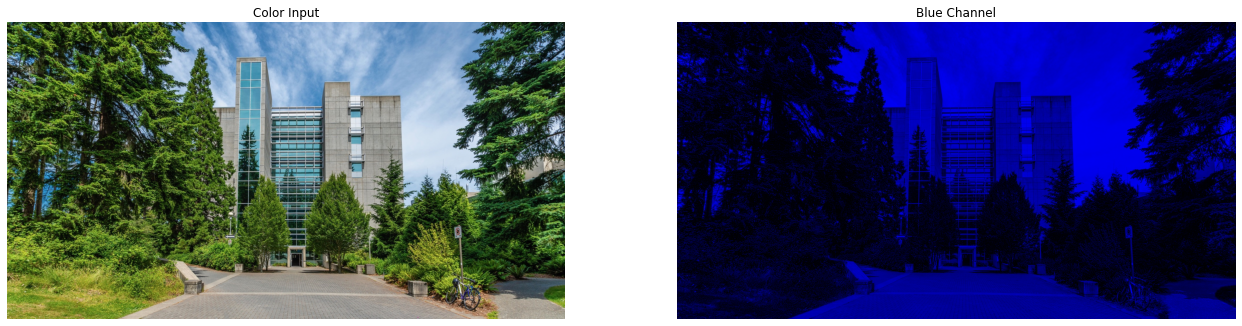

In [ ]:
# TO-DO (1 point): Display, in the same plot, two images: the color input AND only
# its BLUE channel. (tip: pay attention to the color space!)

plt.figure(figsize = (22,22))

# Plot the color input of image
plt.subplot(1, 2, 1)
plt.title('Color Input')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Image's blue channel is exposed by creating a copy and setting its green and red channels to 0
img_blue = img.copy()
img_blue[:, :, 1] = 0
img_blue[:, :, 2] = 0

# Plot the blue channel image
plt.subplot(1, 2, 2)
plt.title('Blue Channel')
plt.imshow(cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Display the plot
plt.show()

**Rescalling the image**: you will often work with image files in different ranges. Typical ranges include (but are not limited to) [0,1] and [0,255]. 

Max value: 1.0 , Min value: 0.0


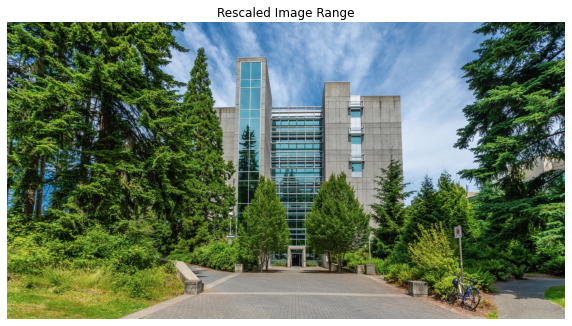

In [ ]:
# TO-DO (2 points): rescale the image to the [0,1] range. Print the max and min values of the rescaled image and 
# plot the new color image.

# Make a copy of the original image and scale it down from int [0,255] to float [0,1] range. 
img_scaled = img.copy()
img_scaled = (img_scaled/255).astype('float32')

# Get the max and min values across all channels of scaled image
max = np.amax([np.amax(img_scaled[:,:,0]), np.amax(img_scaled[:,:,1]), np.amax(img_scaled[:,:,2])])
min = np.amin([np.amin(img_scaled[:,:,0]), np.amin(img_scaled[:,:,1]), np.amin(img_scaled[:,:,2])])

# Print the max and min values of the rescaled image
print('Max value:', max, ', Min value:', min)

# Plot new color image
plt.figure(figsize = (10,10))
plt.plot()
plt.title('Rescaled Image Range')
plt.imshow(cv2.cvtColor(img_scaled, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")
plt.show()

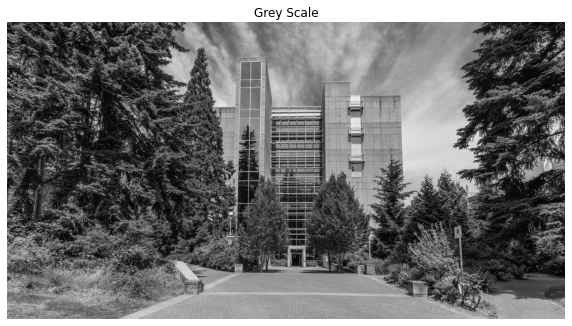

In [ ]:
# TO-DO (5 points):
# 1) Create a greyscale version of the color image MANUALLY;
# 2) Plot this greyscale image.
# - Use the function template provided. 
# BONUS (1 point) - when converting to greyscale, use the ITU-R 601-2 luma transform:
# L = R * 299/1000 + G * 587/1000 + B * 114/1000

def turnGrey(img, threeD=True): 
  # inputs:
  # img = input image to be turned into greyscale by the function
  # threeD = flag (i.e., "True" or "False") determining if the input has one or three channels (for plotting purposes)

  # Image has 3 channels, then do the ITU-R 601-2 luma transform
  if threeD:
    
    # Split RGB channels from input image
    B, R, G = cv2.split(img)

    # Use the ITU-R 601-2 luma transform to convert greyscale
    L =  R * 299/1000 + G * 587/1000 + B * 114/1000

    # Return greyscale image from L conversion
    return np.array(L)

  # Otherwise, return itself since ITU-R 601-2 luma transform works only with 3 channels
  return img

# 1) Create a greyscale version of the color image by first making a copy, and then using function turnGrey
img_greyscale = img_scaled.copy();
img_greyscale = turnGrey(img_greyscale)

# 2) Plot grayscale image obtained by using turnGrey
plt.figure(figsize = (10,10))
plt.plot()
plt.title('Grey Scale')
plt.imshow(cv2.cvtColor(img_greyscale, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")
plt.show()

**Point operators**: these common operators will consider a single pixel intensity of the input image when calculating a given output intensity (conversely from neighborhood operators such as image filters).   

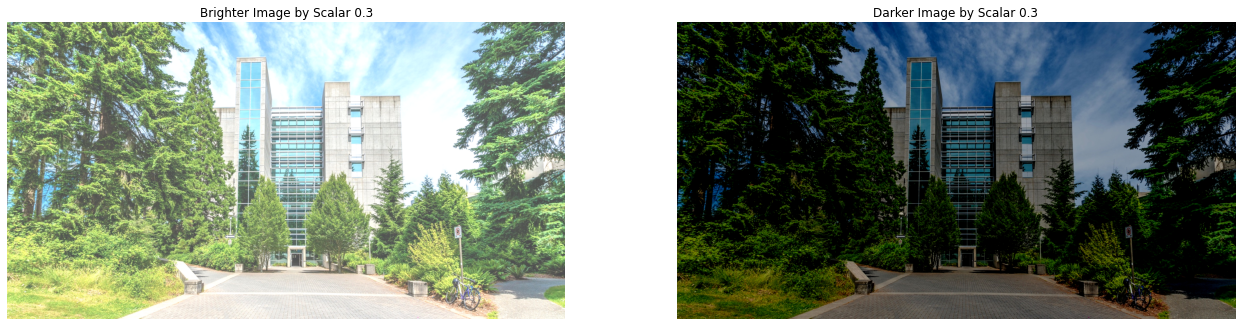

In [ ]:
# TO-DO (4 points): Create two modified versions of the rescaled image. 
# 1) Brigthen the image by adding scalar 0.3 to all its pixel intensities;
# 2) Darken the image by subtracting all pixel values by scalar 0.3. 
# Note 1: your input image should have pixel intensities inside range [0,1]. 
# Note 2: The pixel intensities of the modified image should be inside range [0,1] (i.e., clip intensities if necessary).

img_brighter = img_scaled.copy()
img_darker = img_scaled.copy()

# Set 0.3 scaler tuple for all channels to be used in calculations
scalar = (0.3, 0.3, 0.3, 0)

# 1) Brighten the image by adding scalar 0.3 to all its pixel intensities
img_brighter = cv2.add(img_brighter, scalar)
# Clip its over 1 intensities to [0,1]
img_brighter[img_brighter > 1] = 1

# 2) Darken the image by substracting scalar 0.3 to all its pixel intensities
img_darker = cv2.subtract(img_darker, scalar)
# Clip its lower 0 intensities to [0,1]
img_darker[img_darker < 0] = 0

# TO-DO: Show both modified images in a single plot. 

plt.figure(figsize = (22,22))

# Plot the brighter image
plt.subplot(1, 2, 1)
plt.title('Brighter Image by Scalar 0.3')
plt.imshow(cv2.cvtColor(img_brighter, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Plot the darker image
plt.subplot(1, 2, 2)
plt.title('Darker Image by Scalar 0.3')
plt.imshow(cv2.cvtColor(img_darker, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Display the plot
plt.show()

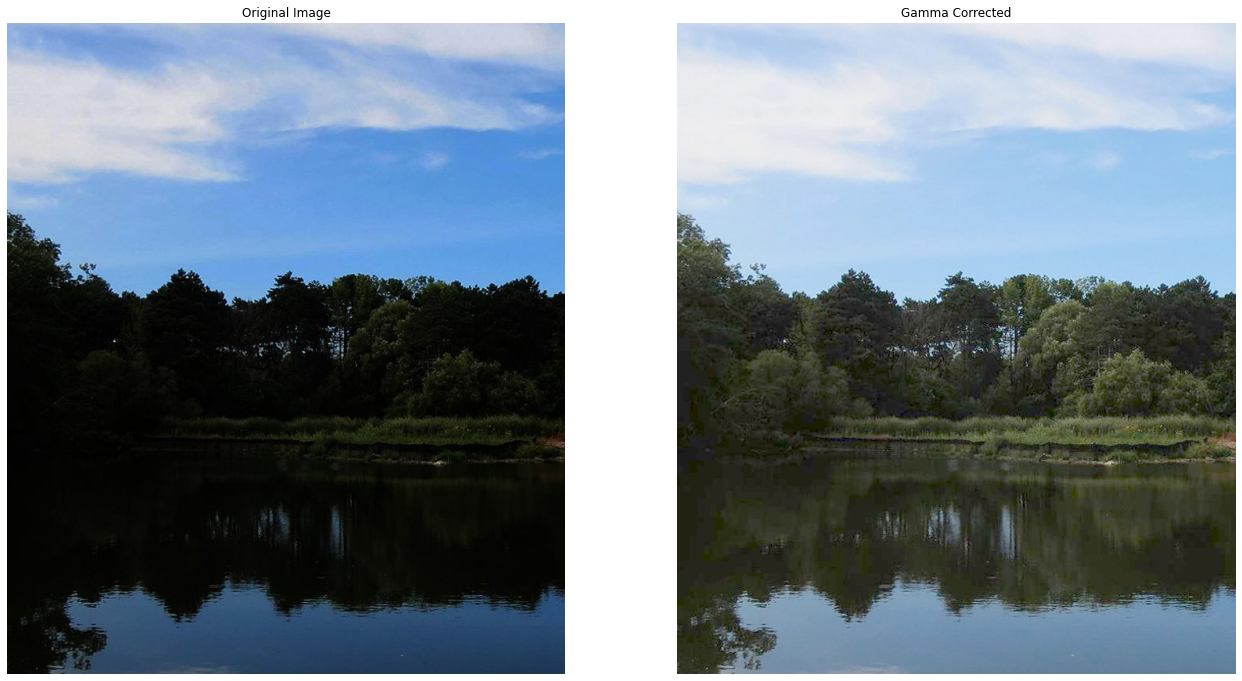

In [ ]:
# TO-DO (5 points): Perform gamma correction in the image located at "gamma_original_address". 
# 1. Download the original image (check if it has been already downloaded first). 
# 2. Perform gamma correction with gamma = 2.2 (refer to gamma correction slides from Lecture #3).
# 3. Plot the original and corrected images in the same plot using matplotlib.

gamma_original_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/gamma_original.jpg"

# 1. Download image:

# Get filename from gamma_original_address
filename = os.path.split(gamma_original_address)[-1]

# Conditional check to use wget if file does not exist in my working directory
if not os.path.isfile(filename):
  output = os.system('wget -nc ' + gamma_original_address) # additionally, flag -nc skips download if file already exists

# 2. Perform gamma correction with gamma = 2.2

# Read image from filename
img_gamma = cv2.imread(filename, -1)

# Create lookup table with gamma = 2.2 calculated for values 0 to 255 using formula from lecture slides
lut = np.array([((x / 255) ** (1/2.2)) * 255 for x in np.arange(0, 256)]).astype("uint8")

# Apply gamma correction using lookup table
img_gamma_corrected = cv2.LUT(img_gamma, lut)

# 3. Plot the original and corrected images in the same plot

# Configure figure sizes to be more readable
plt.figure(figsize = (22,22))

# Plot the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Plot the corrected image
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected')
plt.imshow(cv2.cvtColor(img_gamma_corrected, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Display the plot
plt.show()

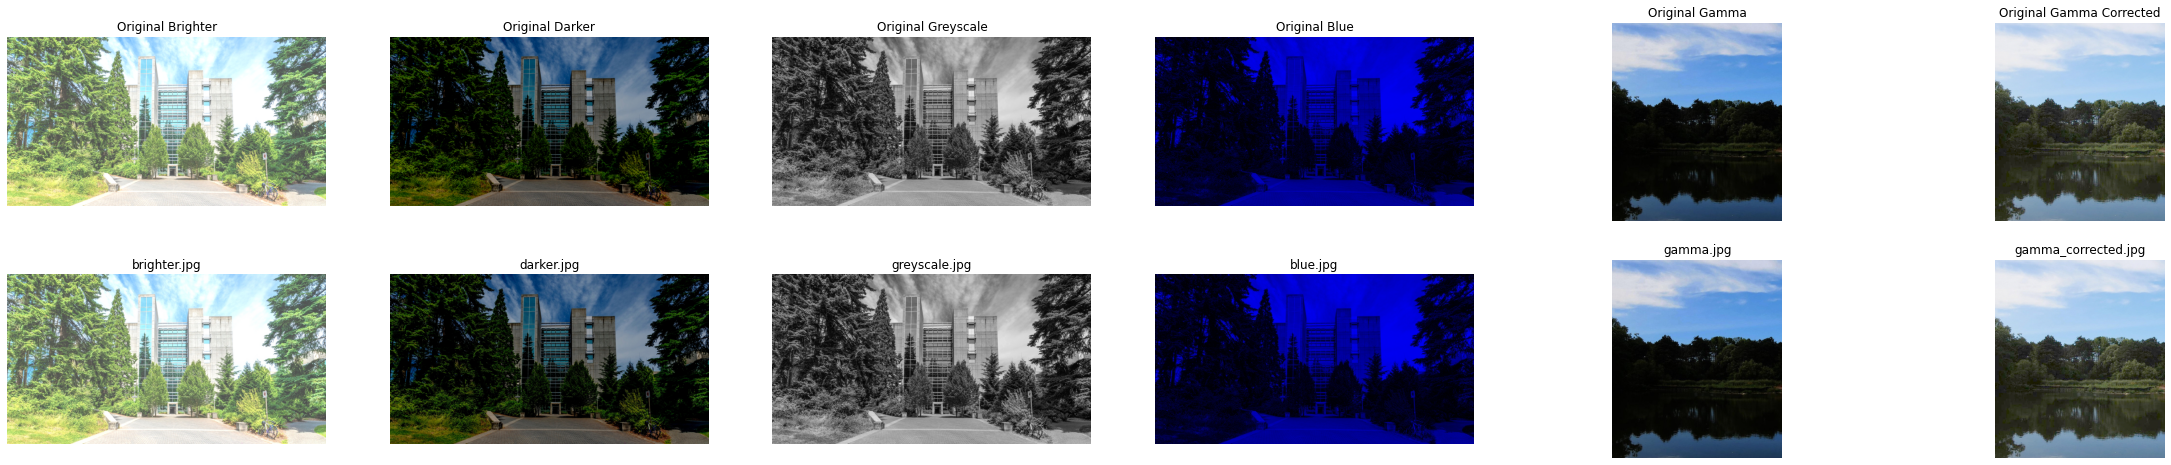

In [ ]:
# # TO-DO (3 points): Save all modified images (i.e., brigther, darker and greyscale) in your Colab working directory
# with .jpg extensions using OpenCV's "cv2.imwrite". The images should be saved
# in a folder named "output" (create this folder USING PYTHON if it does not yet exist).  
# Tips: use "cv2.normalize". Be careful with the image ranges and types. The
# saved images should preserve the "brighter", "darker" and "grey" effects. 

# Create folder 'output' if it does not yet exist
if not os.path.isdir('output'):
    output = os.mkdir('output')

### Save all modified images ###

# Save brighter image, *NOTE: when normalizing, lower range must be 0.3f (adding 0.3 scalar from min 0.0 intensity) so enter min as 255 * 0.3 for cv2.normalize
image2write = cv2.normalize(img_brighter, None, 0.3 * 255, 255, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/brighter.jpg', image2write)

# Save darker image, *NOTE: when normalizing, upper range must be 0.7f (substracting 0.3 scalar from max 1.0 intensity) so enter max as 255 * 0.7 for cv2.normalize
image2write = cv2.normalize(img_darker, None, 0, 255 * 0.7, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/darker.jpg', image2write)

# Save greyscale image
image2write = cv2.normalize(img_greyscale, None, 0, 255, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/greyscale.jpg', image2write)

# Save blue image
image2write = cv2.normalize(img_blue, None, 0, 255, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/blue.jpg', image2write)

# Save gamma image
image2write = cv2.normalize(img_gamma, None, 0, 255, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/gamma.jpg', image2write)

# Save gamma_corrected image
image2write = cv2.normalize(img_gamma_corrected, None, 0, 255, cv2.NORM_MINMAX,  cv2.CV_8U)
output = cv2.imwrite('output/gamma_corrected.jpg', image2write)

##### TESTING BY PLOTTING IMAGES #####

plt.figure(figsize = (40,8))

### Plot all the original images ###
plt.subplot(2, 6, 1)
plt.title('Original Brighter')
plt.imshow(cv2.cvtColor(img_brighter, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 2)
plt.title('Original Darker')
plt.imshow(cv2.cvtColor(img_darker, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 3)
plt.title('Original Greyscale')
plt.imshow(cv2.cvtColor(img_greyscale, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 4)
plt.title('Original Blue')
plt.imshow(cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 5)
plt.title('Original Gamma')
plt.imshow(cv2.cvtColor(img_gamma, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 6)
plt.title('Original Gamma Corrected')
plt.imshow(cv2.cvtColor(img_gamma_corrected, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

### Plot all the saved images ###

plt.subplot(2, 6, 7)
plt.title('brighter.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/brighter.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 8)
plt.title('darker.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/darker.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 9)
plt.title('greyscale.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/greyscale.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 10)
plt.title('blue.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/blue.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 11)
plt.title('gamma.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/gamma.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

plt.subplot(2, 6, 12)
plt.title('gamma_corrected.jpg')
plt.imshow(cv2.cvtColor(cv2.imread('output/gamma_corrected.jpg', -1), cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB
plt.axis("off")

# Display the plot
plt.show()

##### PERFECT MATCH, TESTING COMPLETE #####

### **3.2 Histogram calculation and matching** (50 points)

As discussed in class, histogram matching approximates a given pixel intensity frequency distribution (i.e., histogram) to a second, reference one. In this part of the assignment you are asked to create a function to implement such algorithm. See notes from the Point Operators and Histogram discussion (i.e., Lecture #3) for details on the Histogram matching algorithm.

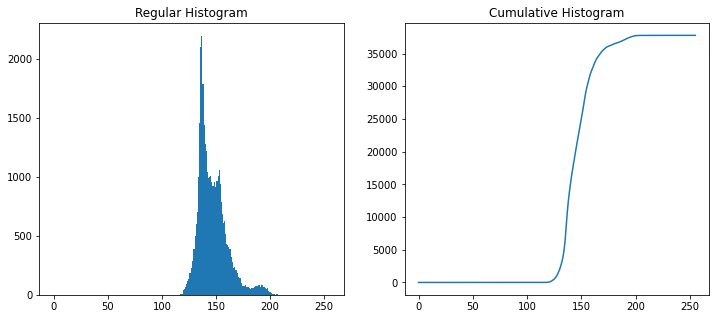

In [ ]:
# TO-DO (13 points): Implement a function that calculates the histogram and the cumulative histogram of a given image MANUALLY.
# You CANNOT use any automated functions for histogram calculation (e.g., matplotlib.plt.hist, np.histogram, cv2.createCLAHE,
# cv2.calcHist). Use the function template provided by filling it with your code. 

def myHistogram(I, cumulative=True):
  #inputs:
  # I: input greyscale image
  # cumulative: flag (i.e., "True" or "False") to determine the type of output. If True, return the cumulative histogram

  # Get dimensions from greyscale image
  row, col = I.shape

  # Initilize empty 256 bins with zeros
  bins = np.zeros(256, np.uint32)

  # Manually add every pixel to corresponding histogram bins
  for i in range(0,row):
    for j in range(0,col):
        bins[I[i,j]] += 1

  # If True, return the cumulative histogram
  if cumulative:
    return np.cumsum(bins)

  # Otherwise, return the regular histogram
  return bins

# TO-DO (2 points): Download the image at "low_contrast_address" and read it with OpenCV as a single channel, 
# greyscale image. Calculate its regular and cumulative histograms using your "myHistogram" function,
# and display both of them in the same matplotlib plot.

low_contrast_address = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/low_contrast.jpg"

# Get filename from low_contrast_address
filename = os.path.split(low_contrast_address)[-1]

# Conditional check to use wget if file does not exist in my working directory
if not os.path.isfile(filename):
  output = os.system('wget -nc ' + low_contrast_address) # additionally, flag -nc skips download if file already exists
  
# Read image as a single channel, greyscale image
img_low_contrast = cv2.imread(filename, 0)

# Obtain histogram and cumulative histogram using myHistogram function
histogram_regular = myHistogram(img_low_contrast, cumulative=False)
histogram_cumulative = myHistogram(img_low_contrast, cumulative=True)

# Configure figure sizes to be more readable
plt.figure(figsize = (12,5))

plt.subplot(1, 2, 1)
plt.title('Regular Histogram')
plt.bar(np.arange(0,256),histogram_regular, 1)

# Plot the corrected image
plt.subplot(1, 2, 2)
plt.title('Cumulative Histogram')
plt.plot(np.arange(0,256),histogram_cumulative)

# Display the plot
plt.show()

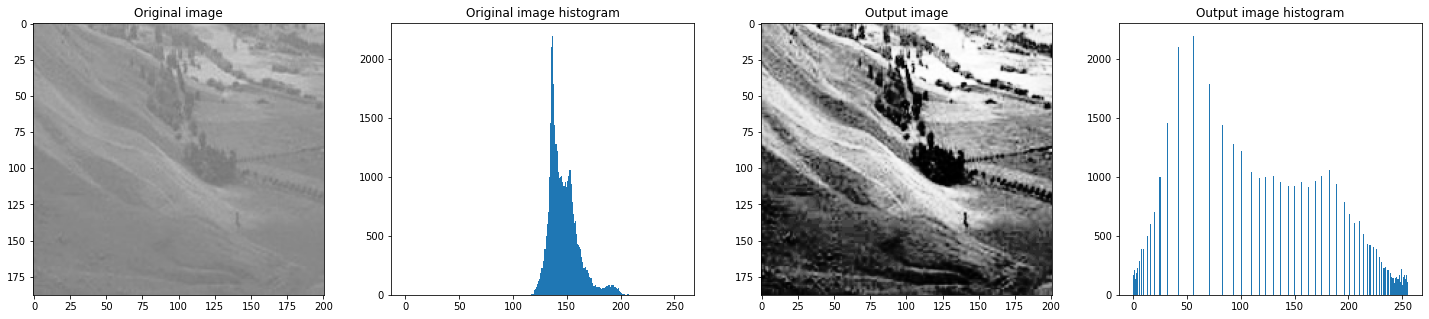

In [ ]:
# TO-DO (12 points): Create a "match_histogram" function to implement the histogram matching algorithm. This function 
# receives an image, a reference cumulative histogram (previously calculated) and a reference number (you
# can use the maximum value of the reference cumulative histogram as a default for this parameter). Its output is a 
# transformation function F(x) that will map an input pixel intensity to an output pixel intensity. For example, 
# if F[11]=17, an input pixel with intensity 11 should be replaced by one of intensity 17. See the details of the
# algorithm in the Histogram lecture, available on BrightSpace. Use the function skeleton provided. (5 points)

def match_histogram(I, Href, nref='default'):
  # inputs:
  # I: input image (greyscale)
  # Href: cumulative histogram of the reference image 
  # nref: parameter to control the transformation behaviour. You can use the max of Href as default value. 

  if nref is 'default':
    nref = np.max(Href)
  
  height, width = I.shape

  n = width * height
  r = n/nref
  h = myHistogram(I, cumulative=False)
  F = np.zeros(256, np.uint32)
  i = j = c = 0
  while i<256:
    if c <= r * Href[j]:
      c = c + h[i]
      F[i] = j
      i = i + 1
    else: 
      j = j + 1

  return F # F is the transformation function (represented as a list)

# TO-DO (2 points): Create a numpy array called Href with 256 positions populated with values 0,1,2,...,255.
Href = np.arange(256)

# TO-DO (2 points): Calculate the cumulative histogram of Href using your myHistogram function. This is 
# going to represent your reference cumulative histogram.
Href_hist_cum = myHistogram(Href.reshape(16,-1), cumulative=True) # Href is reshaped into a two dimensional array in order for it to work with myHistogram function

# TO-DO (2 points): Use your "match_histogram" function where I is the low contrast image and Href is the 
# cumulative histogram you just calculated. You will obtain transformation function F. 
F = match_histogram(img_low_contrast, Href_hist_cum)

# TO-DO (2 points): Apply F (the transformation function you just calculated) to transform
# the pixel intensities from the original image to that of the histogram-matched
# one. You should obtain the histogram-matched image as a result of this operation.
# BONUS (3 points): do not use loops when applying F. 

# Create a copy of the original image to alter and create our histogram matched image
img_histogram_matched = img_low_contrast.copy()
# Match the pixel intensities from the image to the histogram matched F transform.
img_histogram_matched[:,:] = F[img_histogram_matched[:,:]] # I did not use loops when applying F :)

# TO-DO (3 points): Create a 4-element subplot with the matplot lib: 1) Original image; 2) Original 
# image's histogram; 3) Output image (result of the histogram matching procedure);
# 4) the histogram of the output image. 
# Your output show look like this reference: 
# "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/reference_output_1.jpg"
# Tip 1: use "plt.subplots_adjust" to avoid overlapping between adjacent subplots.
# Tip 2: make sure your images are 3-channel before trying to display them with 
# matplotlib. 

plt.figure(figsize = (25,5))

# 1) Original image
plt.subplot(1, 4, 1)
plt.title('Original image')
plt.imshow(cv2.cvtColor(img_low_contrast, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB

# 2) Original image's histogram
plt.subplot(1, 4, 2)
plt.title('Original image histogram')
plt.bar(np.arange(0,256), myHistogram(img_low_contrast, cumulative=False), 1)

# 3) Output image (result of the histogram matching procedure)
plt.subplot(1, 4, 3)
plt.title('Output image')
plt.imshow(cv2.cvtColor(img_histogram_matched, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB

# # 4) the histogram of the output image. 
plt.subplot(1, 4, 4)
plt.title('Output image histogram')
plt.bar(np.arange(0,256), myHistogram(img_histogram_matched, cumulative=False), 1)

# Display the plot
plt.show()

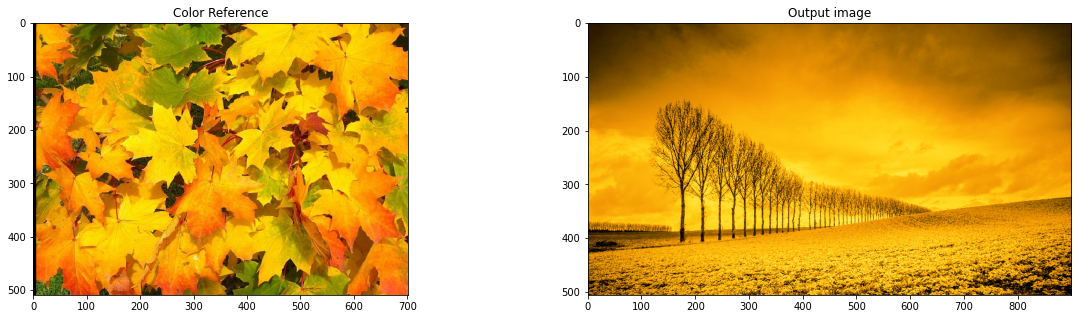

In [ ]:
# TO-DO (9 points): Adapt the histogram matching procedure to 3-channel images 
# (i.e., a single histogram matching process done three times). 
# Download and read the images at the "color_reference_add" and 
# "bw_target_add" addresses. Use the color image to calculate 
# the refence cumulative histograms, and the B&W image as a target of the 
# histogram matching process. Note that both images are 3-channel. 

def matchRGB(target, reference):
  # Inputs:
  # target: image to be modified by the histogram matching process (3-channel)
  # reference: image to be used as reference for the histogram matching process (3-channel)

  # OpenCV uses BGR, calculate F for each channel
  F_blue = match_histogram(target[:,:,0], myHistogram(reference[:,:,0], cumulative=True))
  F_green = match_histogram(target[:,:,1], myHistogram(reference[:,:,1], cumulative=True))
  F_red = match_histogram(target[:,:,2], myHistogram(reference[:,:,2], cumulative=True))

  # Split RGB channels from target image
  B, R, G = cv2.split(target)

  # Match the pixel intensities using calculated F transform for each channel
  B[:,:] = F_blue[B[:,:]]
  G[:,:] = F_green[G[:,:]]
  R[:,:] = F_red[R[:,:]]

  # Merge final image by combining BGR channels
  targetFinal = cv2.merge((B,G,R))

  return targetFinal # modified version of the "target" input image

bw_target_add = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/bw_target.jpg"
color_reference_add = "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/color_reference.png"

# (Download the images at "bw_target_add" and "color_reference_add") and 
# use them as input of your matchRGB function

# Download bw_target_add
filename = os.path.split(bw_target_add)[-1]

# Conditional check to use wget if file does not exist in my working directory
if not os.path.isfile(filename):
  output = os.system('wget -nc ' + bw_target_add) # additionally, flag -nc skips download if file already exists

img_bw_target_add = cv2.imread(filename, -1)


# Download color_reference_add
filename = os.path.split(color_reference_add)[-1]

# Conditional check to use wget if file does not exist in my working directory
if not os.path.isfile(filename):
  output = os.system('wget -nc ' + color_reference_add) # additionally, flag -nc skips download if file already exists

img_color_reference_add = cv2.imread(filename, -1)

# Use them as input to my matchRGB function
img_rgb_matched = matchRGB(img_bw_target_add, img_color_reference_add)

# TO-DO (3 points): Display the reference color image and the output, histogram-matched image. Your output should look 
# like this reference: "https://raw.githubusercontent.com/tunai/storage/master/images/teaching/ece%20473-536/A1/reference_output_2.jpg"
# Tip: be mindful of the colorspace from cv2-read images.

plt.figure(figsize = (20,5))

# 1) Display the reference color image
plt.subplot(1, 2, 1)
plt.title('Color Reference')
plt.imshow(cv2.cvtColor(img_color_reference_add, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB

# 1) Display the output
plt.subplot(1, 2, 2)
plt.title('Output image')
plt.imshow(cv2.cvtColor(img_rgb_matched, cv2.COLOR_BGR2RGB)) # convert image from BGR to RGB

# Display the plot
plt.show()

**End of the assignment!**